<a href="https://colab.research.google.com/github/pedrovinchi1/ProcessamentoImagem/blob/main/FlowersClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!mv kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 94% 212M/225M [00:01<00:00, 150MB/s]
100% 225M/225M [00:01<00:00, 157MB/s]


In [6]:
!unzip -q flowers-recognition.zip

O Dataset Flowers possui 5 classes, sendo elas:daisy, dandelion, rose, sunflower e tulip.

Para uma execução que seja mais rápida do código, utilizarei duas classes que é o que o trabalho pede, pois o google colab tem limitação de tempo de processamento. Sendo assim, precisamos que o processamento seja rápido.

As classes que selecionei para executar o código são Daisy e Rose.

In [7]:
import os
import shutil
import random

# Caminhos
caminho_dataset = './flowers'
caminho_treino = './flowers_filtered/train'
caminho_validacao = './flowers_filtered/validation'

# Criando diretórios para treino e validação
os.makedirs(os.path.join(caminho_treino, 'daisy'), exist_ok=True)
os.makedirs(os.path.join(caminho_treino, 'rose'), exist_ok=True)
os.makedirs(os.path.join(caminho_validacao, 'daisy'), exist_ok=True)
os.makedirs(os.path.join(caminho_validacao, 'rose'), exist_ok=True)

# Função para dividir as imagens em treino e validação
def dividir_imagens(classe, proporcao_treino=0.8):
    caminho_classe = os.path.join(caminho_dataset, classe)
    imagens = os.listdir(caminho_classe)
    random.shuffle(imagens)
    limite_treino = int(len(imagens) * proporcao_treino)
    imagens_treino = imagens[:limite_treino]
    imagens_validacao = imagens[limite_treino:]

    # Copiar imagens para treino
    for img in imagens_treino:
        origem = os.path.join(caminho_classe, img)
        destino = os.path.join(caminho_treino, classe, img)
        shutil.copy(origem, destino)

    # Copiar imagens para validação
    for img in imagens_validacao:
        origem = os.path.join(caminho_classe, img)
        destino = os.path.join(caminho_validacao, classe, img)
        shutil.copy(origem, destino)

# Dividindo as imagens para as classes selecionadas
dividir_imagens('daisy')
dividir_imagens('rose')


Após a execução, uma nova pasta chamada flowers_filtred foi criada, contendo as classes daisy e rose.

Found 1238 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 6, 6, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,806,882 (83.19 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

=== TREINAMENTO INICIAL COM CAMADAS CONGELADAS ===
Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 293s 7s/step - accuracy: 0.5771 - loss: 0.8548 - val_accuracy: 0.8613 - val_loss: 0.4059
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 242s 6s/step - accuracy: 0.7711 - loss: 0.4955 - val_accuracy: 0.9129 - val_loss: 0.2880
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 244s 6s/step - accuracy: 0.8286 - loss: 0.3715 - val_accuracy: 0.9129 - val_loss: 0.2388
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 242s 6s/step - accuracy: 0.8910 - loss: 0.2844 - val_accuracy: 0.9226 - val_loss: 0.2107
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 0.8779 - loss: 0.2986 - val_accuracy: 0.9226 - val_loss: 0.1945
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 279s 7s/step - accuracy: 0.9014 - loss: 0.2565 - val_accuracy: 0.9290 - val_loss: 0.1828
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 243s 6s/step - accuracy: 0.9144 - loss: 0.2188 - val_accuracy: 0.9323 - val_loss: 0.1767
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 241s 6s/step - accurac

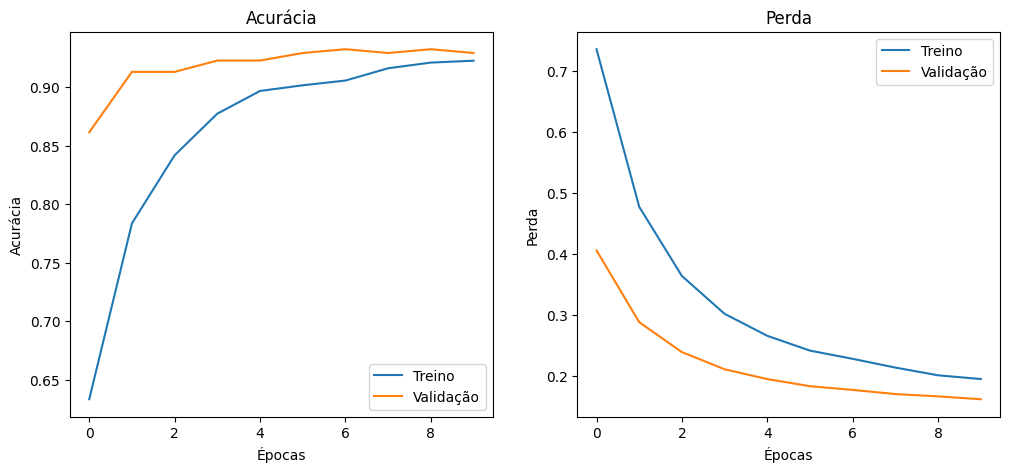

=== FINE-TUNING ===
Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 893s 22s/step - accuracy: 0.7466 - loss: 0.5316 - val_accuracy: 0.9258 - val_loss: 0.1549
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 809s 21s/step - accuracy: 0.8577 - loss: 0.3195 - val_accuracy: 0.9355 - val_loss: 0.1444
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 821s 21s/step - accuracy: 0.9265 - loss: 0.1880 - val_accuracy: 0.9419 - val_loss: 0.1332
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 842s 22s/step - accuracy: 0.9452 - loss: 0.1386 - val_accuracy: 0.9419 - val_loss: 0.1332
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 809s 21s/step - accuracy: 0.9641 - loss: 0.1222 - val_accuracy: 0.9484 - val_loss: 0.1313
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 811s 21s/step - accuracy: 0.9501 - loss: 0.1278 - val_accuracy: 0.9548 - val_loss: 0.1293
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 813s 21s/step - accuracy: 0.9690 - loss: 0.0891 - val_accuracy: 0.9581 - val_loss: 0.1269
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 827s 21s/step - accuracy: 0.9637 - loss: 0.091

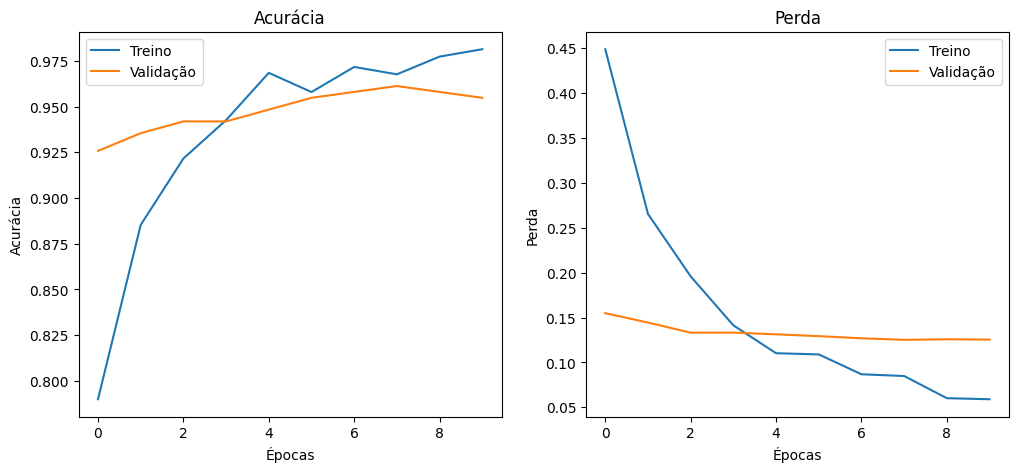

=== AVALIAÇÃO FINAL DO MODELO ===
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step
Matriz de Confusão:
[[146   7]
 [  5 152]]


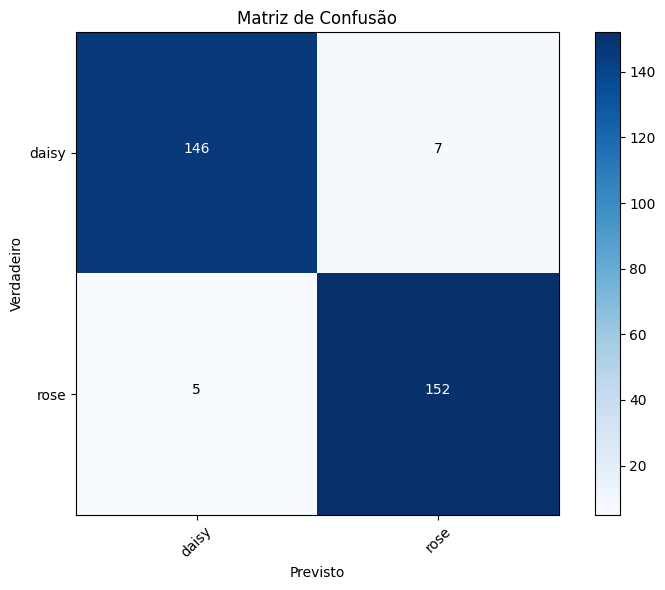

Relatório de Classificação:
              precision    recall  f1-score   support

       daisy       0.97      0.95      0.96       153
        rose       0.96      0.97      0.96       157

    accuracy                           0.96       310
   macro avg       0.96      0.96      0.96       310
weighted avg       0.96      0.96      0.96       310

Acurácia: 0.9613


In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import os
import itertools

# === CONFIGURAÇÕES GLOBAIS ===
caminho_treino = './flowers_filtered/train'
caminho_validacao = './flowers_filtered/validation'
forma_img = (244, 244, 3)
tam_lote = 32
num_epocas_inicial = 10
num_epocas_finetuning = 10

# === FUNÇÕES AUXILIARES ===
# Função para carregar imagens de treino
def obter_imagens_treino(caminho_imagens_treino, forma_img, tam_lote):
    gerador_imagens = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    imagens_treino = gerador_imagens.flow_from_directory(
        caminho_imagens_treino,
        target_size=forma_img[:2],
        batch_size=tam_lote,
        class_mode='categorical',
        shuffle=True
    )
    return imagens_treino

# Função para carregar imagens de validação
def obter_imagens_validacao(caminho_imagens_validacao, forma_img, tam_lote):
    gerador_imagens = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    imagens_validacao = gerador_imagens.flow_from_directory(
        caminho_imagens_validacao,
        target_size=forma_img[:2],
        batch_size=tam_lote,
        class_mode='categorical',
        shuffle=False
    )
    return imagens_validacao

# Função para criar o modelo InceptionV3
def obter_modelo_inception(num_classes):
    modelo_base = keras.applications.InceptionV3(
        include_top=False,
        weights='imagenet',
        input_shape=(244, 244, 3)
    )
    modelo_base.trainable = False
    inputs = keras.Input(shape=(244, 244, 3))
    x = modelo_base(inputs, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
    modelo = keras.Model(inputs, outputs)
    modelo.summary()
    return modelo

# Função para compilar o modelo
def compilar_modelo(modelo, learning_rate=0.0001):
    otimizador = keras.optimizers.Adam(learning_rate=learning_rate)
    modelo.compile(optimizer=otimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo

# Função para treinar o modelo
def treinar_modelo(modelo, imagens_treino, imagens_validacao, num_epocas):
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath='melhores_pesos.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    )
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    historico = modelo.fit(
        imagens_treino,
        epochs=num_epocas,
        validation_data=imagens_validacao,
        callbacks=[checkpoint_callback, early_stop]
    )
    return historico

# Função para realização do fine-tuning
def fine_tuning_modelo(modelo, imagens_treino, imagens_validacao):
    # Descongelar as últimas 20 camadas do modelo base
    for layer in modelo.layers[-20:]:
        layer.trainable = True

    # Recompilando o modelo com uma taxa de aprendizado menor
    otimizador_finetuning = keras.optimizers.Adam(learning_rate=1e-5)
    modelo.compile(optimizer=otimizador_finetuning, loss='categorical_crossentropy', metrics=['accuracy'])

    # Continua o treinamento com fine-tuning
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath='melhores_pesos_finetuning.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    )
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    historico_finetuning = modelo.fit(
        imagens_treino,
        epochs=num_epocas_finetuning,
        validation_data=imagens_validacao,
        callbacks=[checkpoint_callback, early_stop]
    )
    return historico_finetuning

# Função para plotar a matriz de confusão
def plot_matriz_confusao(matriz_confusao, nomes_classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(matriz_confusao, interpolation='nearest', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(len(nomes_classes))
    plt.xticks(tick_marks, nomes_classes, rotation=45)
    plt.yticks(tick_marks, nomes_classes)
    fmt = 'd'
    thresh = matriz_confusao.max() / 2.
    for i, j in itertools.product(range(matriz_confusao.shape[0]), range(matriz_confusao.shape[1])):
        plt.text(j, i, format(matriz_confusao[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matriz_confusao[i, j] > thresh else "black")
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.tight_layout()
    plt.show()

# Função para plotar o histórico de treinamento
def plot_historico(historico):
    plt.figure(figsize=(12, 5))
    # Gráfico de acurácia
    plt.subplot(1, 2, 1)
    plt.plot(historico.history['accuracy'], label='Treino')
    plt.plot(historico.history['val_accuracy'], label='Validação')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Gráfico de perda
    plt.subplot(1, 2, 2)
    plt.plot(historico.history['loss'], label='Treino')
    plt.plot(historico.history['val_loss'], label='Validação')
    plt.title('Perda')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.show()

# Função para avaliar o modelo
def avaliar_modelo(modelo, imagens_validacao):
    # Previsões
    previsoes = modelo.predict(imagens_validacao)
    previsoes_classes = np.argmax(previsoes, axis=1)
    verdadeiras_classes = imagens_validacao.classes
    nomes_classes = list(imagens_validacao.class_indices.keys())

    # Matriz de confusão
    matriz_confusao = confusion_matrix(verdadeiras_classes, previsoes_classes)
    print("Matriz de Confusão:")
    print(matriz_confusao)
    plot_matriz_confusao(matriz_confusao, nomes_classes)

    # Relatório de classificação
    relatorio_classificacao = classification_report(verdadeiras_classes, previsoes_classes, target_names=nomes_classes)
    print("Relatório de Classificação:")
    print(relatorio_classificacao)

    # Acurácia
    acuracia = accuracy_score(verdadeiras_classes, previsoes_classes)
    print(f"Acurácia: {acuracia:.4f}")

# === PIPELINE PRINCIPAL ===
# Carregamento de dados
imagens_treino = obter_imagens_treino(caminho_treino, forma_img, tam_lote)
imagens_validacao = obter_imagens_validacao(caminho_validacao, forma_img, tam_lote)

# Criação e compilação do modelo
modelo = obter_modelo_inception(imagens_treino.num_classes)
modelo = compilar_modelo(modelo)

# Treinamento inicial com camadas congeladas
print("=== TREINAMENTO INICIAL COM CAMADAS CONGELADAS ===")
historico_inicial = treinar_modelo(modelo, imagens_treino, imagens_validacao, num_epocas_inicial)

# Plotar histórico do treinamento inicial
print("=== HISTÓRICO DO TREINAMENTO INICIAL ===")
plot_historico(historico_inicial)

# Fine-tuning
print("=== FINE-TUNING ===")
historico_finetuning = fine_tuning_modelo(modelo, imagens_treino, imagens_validacao)

# Plotar histórico do fine-tuning
print("=== HISTÓRICO DO FINE-TUNING ===")
plot_historico(historico_finetuning)

# Avaliar o modelo após o fine-tuning
print("=== AVALIAÇÃO FINAL DO MODELO ===")
avaliar_modelo(modelo, imagens_validacao)